In [1]:
!conda install -c conda-forge beautifulsoup4 --yes

!conda install -c conda-forge geopy --yes

!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\xueya\anaconda3

  added / updated specs:
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.9.1       |   py37hc8dfbb8_0         164 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         184 KB  conda-forge
    certifi-2020.6.20          |   py37hc8dfbb8_0         151 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         498 KB

The following packages will be UPDATED:

  beautifulsoup4     pkgs/main::beautifulsoup4-4.9.0-py37_0 --> conda-forge::beautifulsoup4-4.9.1-py37hc8dfbb8_0
  ca-certificates                     2020.4.5.1-hecc5488_0 --> 2020.6.20-hecda079_0
  certifi                         2020.4.5.1-py37hc8dfbb8_0 --> 2020.6.20-py37hc8dfbb8_0






In [6]:
import json
from bs4 import BeautifulSoup
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans


import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


# Define Foursquare Credentials and Version

In [3]:
CLIENT_ID = 'PPSZ11ZZJZYTZKIXOABEQYW1H1WZTWVTXUEVKJ5ULONUP1DQ' # your Foursquare ID
CLIENT_SECRET = '1TKOQ425RCFWYEWRYMLUYJRKYQ0POCVXSVBYDK5DAOUE4TJ4' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PPSZ11ZZJZYTZKIXOABEQYW1H1WZTWVTXUEVKJ5ULONUP1DQ
CLIENT_SECRET:1TKOQ425RCFWYEWRYMLUYJRKYQ0POCVXSVBYDK5DAOUE4TJ4


## Assume our destination for the trip is the Universal Studios Florida.

In [7]:
address = '6000 Universal Blvd, Orlando, FL'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

28.471878949999997 -81.47121064527349


## Search for the hotels that are within 1.5km from the park.

In [43]:
search_query = 'Hotel'
radius = 1500
print(search_query + ' .... OK!')

Hotel .... OK!


In [44]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=PPSZ11ZZJZYTZKIXOABEQYW1H1WZTWVTXUEVKJ5ULONUP1DQ&client_secret=1TKOQ425RCFWYEWRYMLUYJRKYQ0POCVXSVBYDK5DAOUE4TJ4&ll=28.471878949999997,-81.47121064527349&v=20180604&query=Hotel&radius=1500&limit=30'

In [45]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5efac16b2f5bc4555bca3781'},
 'response': {'venues': [{'id': '4283ee00f964a52097221fe3',
    'name': 'Hard Rock Hotel at Universal Orlando',
    'location': {'address': '5800 Universal Blvd',
     'lat': 28.47714156614553,
     'lng': -81.464524269104,
     'labeledLatLngs': [{'label': 'display',
       'lat': 28.47714156614553,
       'lng': -81.464524269104}],
     'distance': 878,
     'postalCode': '32819',
     'cc': 'US',
     'city': 'Orlando',
     'state': 'FL',
     'country': 'United States',
     'formattedAddress': ['5800 Universal Blvd',
      'Orlando, FL 32819',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d12f951735',
      'name': 'Resort',
      'pluralName': 'Resorts',
      'shortName': 'Resort',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/resort_',
       'suffix': '.png'},
      'primary': True}],
    'delivery': {'id': '1725601',
     'url': 'https://www.grubhub.com/restaurant/t

## transform into pandas dataframe

In [61]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.sort_values(by=['location.distance'], ascending = True, inplace=True)
dataframe.head()

C:\Users\xueya\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,...,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id,location.crossStreet
22,4b058690f964a5200f6622e3,Hard Rock Cafe Orlando,"[{'id': '56aa371be4b08b9a8d573538', 'name': 'T...",v-1593492173,False,6050 Universal Blvd,28.473738,-81.467561,"[{'label': 'display', 'lat': 28.4737377306628,...",412,...,United States,"[6050 Universal Blvd (at Universal CityWalk), ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,at Universal CityWalk
28,4b4c0456f964a5200fad26e3,Hard Rock Live Orlando,"[{'id': '4bf58dd8d48988d1e5931735', 'name': 'M...",v-1593492173,False,6050 Universal Blvd,28.473423,-81.467339,"[{'label': 'display', 'lat': 28.47342301035056...",416,...,United States,"[6050 Universal Blvd (at Universal CityWalk), ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,at Universal CityWalk
9,521b89f611d2570f28e1bf39,Hard Rock Hotel Valet,"[{'id': '4f04b1572fb6e1c99f3db0bf', 'name': 'S...",v-1593492173,False,NaN,28.473722,-81.467171,"[{'label': 'display', 'lat': 28.47372246281708...",445,...,United States,"[Orlando, FL, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,4b4b9717f964a52036a126e3,Loews Royal Pacific Resort,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1593492173,False,6300 Hollywood Way,28.468639,-81.467503,"[{'label': 'display', 'lat': 28.46863856649586...",511,...,United States,"[6300 Hollywood Way, Orlando, FL 32819, United...",NaN,NaN,NaN,NaN,NaN,NaN,61577394,NaN
13,4df511ea22718759f8254ceb,Priscilla Hotel For Single Young Ladies,"[{'id': '4bf58dd8d48988d116941735', 'name': 'B...",v-1593492173,False,park,28.476453,-81.469272,"[{'label': 'display', 'lat': 28.47645278, 'lng...",543,...,United States,"[park, universal studios, FL, United States]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### keep only useful information.

In [59]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)
# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dataframe_filtered= dataframe_filtered.loc[dataframe_filtered['categories'] == "Hotel"]
dataframe_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
26,Loews Royal Pacific Resort,Hotel,6300 Hollywood Way,28.468639,-81.467503,"[{'label': 'display', 'lat': 28.46863856649586...",511,32819,US,Orlando,FL,United States,"[6300 Hollywood Way, Orlando, FL 32819, United...",NaN,4b4b9717f964a52036a126e3
10,Pricilla Hotel,Hotel,Universal Studios,28.476559,-81.469380,"[{'label': 'display', 'lat': 28.47655939385056...",550,32819,US,Orlando,FL,United States,"[Universal Studios (New York), Orlando, FL 328...",New York,5101eb56e4b01fa7d7592c15
15,Empire Hotel,Hotel,Universal Studios,28.477204,-81.469171,"[{'label': 'display', 'lat': 28.47720439346763...",625,32819,US,Orlando,FL,United States,"[Universal Studios, Orlando, FL 32819, United ...",NaN,5101ed5be4b04647cde45bf2
17,Lowes Adventura Hotel At Universal Studios,Hotel,6725 Adventure Way,28.465466,-81.471115,"[{'label': 'display', 'lat': 28.46546554565429...",713,32819,US,Orlando,FL,United States,"[6725 Adventure Way, Orlando, FL 32819, United...",NaN,5bfac19d1c0b34002ca05fa5
7,Universal's Aventura Hotel,Hotel,6725 Adventure Way,28.465076,-81.471188,"[{'label': 'display', 'lat': 28.46507579036141...",757,32819,US,Orlando,FL,United States,"[6725 Adventure Way, Orlando, FL 32819, United...",NaN,5b6c7e89b54618002c271d2e
18,Club 7 at the Hard Rock Hotel,Hotel,NaN,28.477155,-81.464361,"[{'label': 'display', 'lat': 28.47715509313276...",891,NaN,US,NaN,Florida,United States,"[Florida, United States]",NaN,4d0817a24adb370401e6fa54
2,Orlando Continental Plaza Hotel,Hotel,6825 Visitors Cir,28.462913,-81.466296,"[{'label': 'display', 'lat': 28.46291303914135...",1107,32819,US,Orlando,FL,United States,"[6825 Visitors Cir, Orlando, FL 32819, United ...",NaN,4bcf5b4b0ffdce726465b2c0
20,The Lord Hotel,Hotel,5859 American Way,28.464859,-81.460503,"[{'label': 'display', 'lat': 28.46485900878906...",1307,32819,US,Orlando,FL,United States,"[5859 American Way, Orlando, FL 32819, United ...",NaN,4e3b433b62e19d610951e6bc
21,The Blue Palm Hotel,Hotel,5859 American Way,28.464859,-81.460503,"[{'label': 'entrance', 'lat': 28.464809, 'lng'...",1307,32819,US,Orlando,FL,United States,"[5859 American Way, Orlando, FL 32819, United ...",NaN,4bc361dbdce4eee1ac93719d
24,Loewe Hotel,Hotel,NaN,28.467865,-81.458107,"[{'label': 'display', 'lat': 28.46786511718431...",1357,32819,US,Orlando,FL,United States,"[Orlando, FL 32819, United States]",NaN,4d2460aa53e4a0937dbb8677


## visualize hotels that are nearby

In [62]:
dataframe_filtered.name

26                           Loews Royal Pacific Resort
10                                       Pricilla Hotel
15                                         Empire Hotel
17           Lowes Adventura Hotel At Universal Studios
7                            Universal's Aventura Hotel
18                        Club 7 at the Hard Rock Hotel
2                       Orlando Continental Plaza Hotel
20                                       The Lord Hotel
21                                  The Blue Palm Hotel
24                                          Loewe Hotel
29    Holiday Inn & Suites Across From Universal Orl...
1        Loews Portofino Bay Hotel at Universal Orlando
6                    Best Western Orlando Gateway Hotel
Name: name, dtype: object

In [63]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

# Compare the rating of the nearest five hotels

In [66]:
#1st
venue_id = '4b4b9717f964a52036a126e3' # ID of Loews Royal Pacific Resort#
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

8.8


In [109]:
id_list = [dataframe_filtered.id]
id_list

[26    4b4b9717f964a52036a126e3
 10    5101eb56e4b01fa7d7592c15
 15    5101ed5be4b04647cde45bf2
 17    5bfac19d1c0b34002ca05fa5
 7     5b6c7e89b54618002c271d2e
 18    4d0817a24adb370401e6fa54
 2     4bcf5b4b0ffdce726465b2c0
 20    4e3b433b62e19d610951e6bc
 21    4bc361dbdce4eee1ac93719d
 24    4d2460aa53e4a0937dbb8677
 29    4bb9489098c7ef3b6cff3102
 1     4b05868cf964a5206c6522e3
 6     4ba93dbcf964a5205a173ae3
 Name: id, dtype: object]

In [110]:
#2nd 
venue_id = '5101eb56e4b01fa7d7592c15' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [111]:
#3rd
venue_id = '5101ed5be4b04647cde45bf2' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [112]:
#4
venue_id = '5bfac19d1c0b34002ca05fa5' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [113]:
#5
venue_id = '5b6c7e89b54618002c271d2e' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

8.1


In [114]:
#6
venue_id = '4d0817a24adb370401e6fa54' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

6.9


In [115]:
#7
venue_id = '4bcf5b4b0ffdce726465b2c0' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

5.2


In [116]:
#8
venue_id = '4e3b433b62e19d610951e6bc' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [117]:
#9
venue_id = '4bc361dbdce4eee1ac93719d' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [118]:
#10
venue_id = '4d2460aa53e4a0937dbb8677' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [119]:
#11
venue_id = '4bb9489098c7ef3b6cff3102' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

6.9


In [120]:
#12
venue_id = '4b05868cf964a5206c6522e3' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

9.2


In [128]:
#13
venue_id = '4ba93dbcf964a5205a173ae3' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')


6.6


In [123]:
distance_list = [dataframe_filtered.distance]
distance_list

[26     511
 10     550
 15     625
 17     713
 7      757
 18     891
 2     1107
 20    1307
 21    1307
 24    1357
 29    1421
 1     1423
 6     1709
 Name: distance, dtype: int64]

## Search restaurants around the three top rated hotels

In [176]:
#1 Loews Royal Pacific Resort
latitude = 28.468639
longitude = -81.467503
search_query = 'restaurant'
radius = 1000
print(search_query + ' .... OK!')

restaurant .... OK!


In [177]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results_1 = requests.get(url).json()
venues_1 = results_1['response']['venues']

# tranform venues into a dataframe
restaurant1 = json_normalize(venues_1)
restaurant1.sort_values(by=['location.distance'], ascending = True, inplace=True)
restaurant1.head()

C:\Users\xueya\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,...,location.country,location.formattedAddress,location.crossStreet,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id
10,539ce2dd498e40a9f6829815,Vivo Italian Kitchen,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1593501978,False,6000 Universal Blvd,28.473063,-81.465647,"[{'label': 'display', 'lat': 28.47306265781803...",524,...,United States,"[6000 Universal Blvd (at Universal CityWalk), ...",at Universal CityWalk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4beded76e24d20a144417214,Bob Marley: A Tribute To Freedom,"[{'id': '4bf58dd8d48988d144941735', 'name': 'C...",v-1593501978,False,6000 Universal Blvd,28.472875,-81.465123,"[{'label': 'display', 'lat': 28.47287499588204...",525,...,United States,"[6000 Universal Blvd (at Universal Citywalk), ...",at Universal Citywalk,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4baa623af964a52008653ae3,Circus McGurkus Cafe Stoo-pendous,"[{'id': '4bf58dd8d48988d147941735', 'name': 'D...",v-1593501978,False,Seuss Landing,28.473163,-81.469803,"[{'label': 'display', 'lat': 28.47316347107087...",551,...,United States,"[Seuss Landing (at Islands of Adventure), Orla...",at Islands of Adventure,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,4b5c7d95f964a520783229e3,Thunder Falls Terrace,"[{'id': '4bf58dd8d48988d1df931735', 'name': 'B...",v-1593501978,False,Jurassic Park,28.469765,-81.473314,"[{'label': 'display', 'lat': 28.46976489750437...",582,...,United States,"[Jurassic Park (Islands of Adventure), Orlando...",Islands of Adventure,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,4b50c562f964a520b83127e3,Mythos,"[{'id': '4bf58dd8d48988d10e941735', 'name': 'G...",v-1593501978,False,The Lost Continent,28.472640,-81.471439,"[{'label': 'display', 'lat': 28.47264026289861...",588,...,United States,"[The Lost Continent (at Islands of Adventure),...",at Islands of Adventure,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
filtered_columns1 = ['name', 'categories'] + [col for col in restaurant1.columns if col.startswith('location.')] + ['id']
restaurant1_filtered = restaurant1.loc[:, filtered_columns1]
# filter the category for each row
restaurant1_filtered['categories'] = restaurant1_filtered.apply(get_category_type, axis=1)
# clean column names by keeping only last term
restaurant1_filtered.columns = [column.split('.')[-1] for column in restaurant1_filtered.columns]
restaurant1_filtered.shape

(15, 15)

In [179]:
restaurant1_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
10,Vivo Italian Kitchen,Italian Restaurant,6000 Universal Blvd,28.473063,-81.465647,"[{'label': 'display', 'lat': 28.47306265781803...",524,32819,US,Orlando,FL,United States,"[6000 Universal Blvd (at Universal CityWalk), ...",at Universal CityWalk,539ce2dd498e40a9f6829815
7,Bob Marley: A Tribute To Freedom,Caribbean Restaurant,6000 Universal Blvd,28.472875,-81.465123,"[{'label': 'display', 'lat': 28.47287499588204...",525,32819,US,Orlando,FL,United States,"[6000 Universal Blvd (at Universal Citywalk), ...",at Universal Citywalk,4beded76e24d20a144417214
9,Circus McGurkus Cafe Stoo-pendous,Diner,Seuss Landing,28.473163,-81.469803,"[{'label': 'display', 'lat': 28.47316347107087...",551,32819,US,Orlando,FL,United States,"[Seuss Landing (at Islands of Adventure), Orla...",at Islands of Adventure,4baa623af964a52008653ae3
13,Thunder Falls Terrace,BBQ Joint,Jurassic Park,28.469765,-81.473314,"[{'label': 'display', 'lat': 28.46976489750437...",582,32819,US,Orlando,FL,United States,"[Jurassic Park (Islands of Adventure), Orlando...",Islands of Adventure,4b5c7d95f964a520783229e3
14,Mythos,Greek Restaurant,The Lost Continent,28.472640,-81.471439,"[{'label': 'display', 'lat': 28.47264026289861...",588,32819,US,Orlando,FL,United States,"[The Lost Continent (at Islands of Adventure),...",at Islands of Adventure,4b50c562f964a520b83127e3
8,Oshio Korean BBQ,Korean Restaurant,6800 Visitors Cir,28.463251,-81.465498,"[{'label': 'display', 'lat': 28.46325100820970...",631,32819,US,Orlando,FL,United States,"[6800 Visitors Cir, Orlando, FL 32819, United ...",NaN,54e02fbb498e4bfeb5320730
4,Las Brisas Restaurant,Food,6233 International Dr,28.462166,-81.467087,"[{'label': 'entrance', 'lat': 28.461708, 'lng'...",721,32819,US,Orlando,FL,United States,"[6233 International Dr, Orlando, FL 32819, Uni...",NaN,4f327fbb19836c91c7ddbf07
0,Via Brasil Brazilian Restaurant,Brazilian Restaurant,6315 International Dr,28.461344,-81.467443,"[{'label': 'display', 'lat': 28.46134391842936...",812,32819,US,Orlando,FL,United States,"[6315 International Dr, Orlando, FL 32819, Uni...",NaN,58b1ada219b1ad54934d5229
5,Kohola Reef Restaurant,BBQ Joint,Wave Village,28.462716,-81.472433,"[{'label': 'display', 'lat': 28.46271588727033...",816,32819,US,Orlando,FL,United States,"[Wave Village (Universal's Volcano Bay), Orlan...",Universal's Volcano Bay,5900dbfb67e5f22787d2e7be
11,Tavistock Restaurants,Building,7680 Universal Blvd,28.461786,-81.463047,"[{'label': 'display', 'lat': 28.46178633363962...",878,32819,US,Orlando,FL,United States,"[7680 Universal Blvd, Orlando, FL 32819, Unite...",NaN,4e147ff1ae60fe00dfdf9326


In [197]:
#2 Universal 
latitude = 28.465076
longitude = -81.471188
search_query = 'restaurant'
radius = 1000
print(search_query + ' .... OK!')

restaurant .... OK!


In [198]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results_2 = requests.get(url).json()
venues_2 = results_2['response']['venues']

# tranform venues into a dataframe
restaurant2 = json_normalize(venues_2)
restaurant2.sort_values(by=['location.distance'], ascending = True, inplace=True)
restaurant2.head()

C:\Users\xueya\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,...,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id,location.crossStreet
4,5900dbfb67e5f22787d2e7be,Kohola Reef Restaurant,"[{'id': '4bf58dd8d48988d1df931735', 'name': 'B...",v-1593502306,False,Wave Village,28.462716,-81.472433,"[{'label': 'display', 'lat': 28.46271588727033...",289,...,United States,"[Wave Village (Universal's Volcano Bay), Orlan...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Universal's Volcano Bay
5,4f327fbb19836c91c7ddbf07,Las Brisas Restaurant,"[{'id': '4d4b7105d754a06374d81259', 'name': 'F...",v-1593502306,False,6233 International Dr,28.462166,-81.467087,"[{'label': 'entrance', 'lat': 28.461708, 'lng'...",515,...,United States,"[6233 International Dr, Orlando, FL 32819, Uni...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,58b1ada219b1ad54934d5229,Via Brasil Brazilian Restaurant,"[{'id': '4bf58dd8d48988d16b941735', 'name': 'B...",v-1593502306,False,6315 International Dr,28.461344,-81.467443,"[{'label': 'display', 'lat': 28.46134391842936...",554,...,United States,"[6315 International Dr, Orlando, FL 32819, Uni...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,4b5c7d95f964a520783229e3,Thunder Falls Terrace,"[{'id': '4bf58dd8d48988d1df931735', 'name': 'B...",v-1593502306,False,Jurassic Park,28.469765,-81.473314,"[{'label': 'display', 'lat': 28.46976489750437...",561,...,United States,"[Jurassic Park (Islands of Adventure), Orlando...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Islands of Adventure
9,54e02fbb498e4bfeb5320730,Oshio Korean BBQ,"[{'id': '4bf58dd8d48988d113941735', 'name': 'K...",v-1593502306,False,6800 Visitors Cir,28.463251,-81.465498,"[{'label': 'display', 'lat': 28.46325100820970...",592,...,United States,"[6800 Visitors Cir, Orlando, FL 32819, United ...",NaN,NaN,NaN,NaN,NaN,NaN,477065924,NaN


In [200]:
filtered_columns2 = ['name', 'categories'] + [col for col in restaurant2.columns if col.startswith('location.')] + ['id']
restaurant2_filtered = restaurant2.loc[:, filtered_columns2]
# filter the category for each row
restaurant2_filtered['categories'] = restaurant2_filtered.apply(get_category_type, axis=1)
# clean column names by keeping only last term
restaurant2_filtered.columns = [column.split('.')[-1] for column in restaurant2_filtered.columns]
restaurant2_filtered.shape

(16, 15)

In [201]:
restaurant2_filtered

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,id
4,Kohola Reef Restaurant,BBQ Joint,Wave Village,28.462716,-81.472433,"[{'label': 'display', 'lat': 28.46271588727033...",289,32819,US,Orlando,FL,United States,"[Wave Village (Universal's Volcano Bay), Orlan...",Universal's Volcano Bay,5900dbfb67e5f22787d2e7be
5,Las Brisas Restaurant,Food,6233 International Dr,28.462166,-81.467087,"[{'label': 'entrance', 'lat': 28.461708, 'lng'...",515,32819,US,Orlando,FL,United States,"[6233 International Dr, Orlando, FL 32819, Uni...",NaN,4f327fbb19836c91c7ddbf07
0,Via Brasil Brazilian Restaurant,Brazilian Restaurant,6315 International Dr,28.461344,-81.467443,"[{'label': 'display', 'lat': 28.46134391842936...",554,32819,US,Orlando,FL,United States,"[6315 International Dr, Orlando, FL 32819, Uni...",NaN,58b1ada219b1ad54934d5229
12,Thunder Falls Terrace,BBQ Joint,Jurassic Park,28.469765,-81.473314,"[{'label': 'display', 'lat': 28.46976489750437...",561,32819,US,Orlando,FL,United States,"[Jurassic Park (Islands of Adventure), Orlando...",Islands of Adventure,4b5c7d95f964a520783229e3
9,Oshio Korean BBQ,Korean Restaurant,6800 Visitors Cir,28.463251,-81.465498,"[{'label': 'display', 'lat': 28.46325100820970...",592,32819,US,Orlando,FL,United States,"[6800 Visitors Cir, Orlando, FL 32819, United ...",NaN,54e02fbb498e4bfeb5320730
15,Mythos,Greek Restaurant,The Lost Continent,28.472640,-81.471439,"[{'label': 'display', 'lat': 28.47264026289861...",842,32819,US,Orlando,FL,United States,"[The Lost Continent (at Islands of Adventure),...",at Islands of Adventure,4b50c562f964a520b83127e3
11,Tavistock Restaurants,Building,7680 Universal Blvd,28.461786,-81.463047,"[{'label': 'display', 'lat': 28.46178633363962...",876,32819,US,Orlando,FL,United States,"[7680 Universal Blvd, Orlando, FL 32819, Unite...",NaN,4e147ff1ae60fe00dfdf9326
3,Nile Ethiopian Restaurant,Ethiopian Restaurant,7048 International Dr,28.457024,-81.472172,"[{'label': 'display', 'lat': 28.45702369477081...",901,32819,US,Orlando,FL,United States,"[7048 International Dr, Orlando, FL 32819, Uni...",NaN,4b5a50a6f964a52082bc28e3
1,World's Magic Restaurant,Middle Eastern Restaurant,7044 International Dr,28.456947,-81.472190,"[{'label': 'display', 'lat': 28.45694718721659...",910,32819,US,Orlando,FL,United States,"[7044 International Dr, Orlando, FL 32819, Uni...",NaN,5888f80d55d622104fdc11e8
13,Circus McGurkus Cafe Stoo-pendous,Diner,Seuss Landing,28.473163,-81.469803,"[{'label': 'display', 'lat': 28.47316347107087...",910,32819,US,Orlando,FL,United States,"[Seuss Landing (at Islands of Adventure), Orla...",at Islands of Adventure,4baa623af964a52008653ae3


In [192]:
#3
latitude = 28.480846
longitude = -81.460843
search_query = 'restaurant'
radius = 1000
print(search_query + ' .... OK!')

restaurant .... OK!


In [193]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
results_3 = requests.get(url).json()
venues_3 = results_3['response']['venues']

# tranform venues into a dataframe
restaurant3 = json_normalize(venues_3)
restaurant3.sort_values(by=['location.distance'], ascending = True, inplace=True)
restaurant3.head()

C:\Users\xueya\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,...,location.state,location.country,location.formattedAddress,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,venuePage.id
1,4d101b9f38bb6ea8c1a8c2aa,Mama Della's Ristorante,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1593502223,False,5601 Universal Blvd,in Loews Portofino Bay Hotel,28.480721,-81.460840,"[{'label': 'display', 'lat': 28.48072131753682...",...,FL,United States,[5601 Universal Blvd (in Loews Portofino Bay H...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4bd38fa3462cb7133ccede07,BiCE Orlando,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1593502223,False,5601 Universal Blvd,NaN,28.480604,-81.461364,"[{'label': 'display', 'lat': 28.48060427313225...",...,FL,United States,"[5601 Universal Blvd, Orlando, FL 32819, Unite...",1589356,https://www.grubhub.com/restaurant/bice-orland...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,347943049
2,4f3226c419836c91c7bb38c5,Sawadee Thai Restaurant,"[{'id': '4bf58dd8d48988d149941735', 'name': 'T...",v-1593502223,False,5320 S Kirkman Rd,NaN,28.484976,-81.459641,"[{'label': 'display', 'lat': 28.48497581481933...",...,FL,United States,"[5320 S Kirkman Rd, Orlando, FL 32819, United ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4b058697f964a520256722e3,The Palm Orlando,"[{'id': '4bf58dd8d48988d1cc941735', 'name': 'S...",v-1593502223,False,5800 Universal Blvd,NaN,28.477117,-81.464620,"[{'label': 'display', 'lat': 28.47711656455560...",...,FL,United States,"[5800 Universal Blvd, Orlando, FL 32819, Unite...",1649243,https://www.grubhub.com/restaurant/the-palm-or...,grubhub,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_grubhub_20180129.png,NaN
0,4bfe9064f7c82d7f0dc18f04,Louie's Italian Restaurant,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1593502223,False,New York,Universal Studios Florida,28.477348,-81.469196,"[{'label': 'display', 'lat': 28.47734786754995...",...,FL,United States,"[New York (Universal Studios Florida), Orlando...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
filtered_columns3 = ['name', 'categories'] + [col for col in restaurant3.columns if col.startswith('location.')] + ['id']
restaurant3_filtered = restaurant3.loc[:, filtered_columns3]
# filter the category for each row
restaurant3_filtered['categories'] = restaurant3_filtered.apply(get_category_type, axis=1)
# clean column names by keeping only last term
restaurant3_filtered.columns = [column.split('.')[-1] for column in restaurant3_filtered.columns]
restaurant3_filtered.shape

(11, 15)

In [203]:
restaurant3_filtered

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
1,Mama Della's Ristorante,Italian Restaurant,5601 Universal Blvd,in Loews Portofino Bay Hotel,28.480721,-81.460840,"[{'label': 'display', 'lat': 28.48072131753682...",13,32819,US,Orlando,FL,United States,[5601 Universal Blvd (in Loews Portofino Bay H...,4d101b9f38bb6ea8c1a8c2aa
3,BiCE Orlando,Italian Restaurant,5601 Universal Blvd,NaN,28.480604,-81.461364,"[{'label': 'display', 'lat': 28.48060427313225...",57,32819,US,Orlando,FL,United States,"[5601 Universal Blvd, Orlando, FL 32819, Unite...",4bd38fa3462cb7133ccede07
2,Sawadee Thai Restaurant,Thai Restaurant,5320 S Kirkman Rd,NaN,28.484976,-81.459641,"[{'label': 'display', 'lat': 28.48497581481933...",474,32819,US,Orlando,FL,United States,"[5320 S Kirkman Rd, Orlando, FL 32819, United ...",4f3226c419836c91c7bb38c5
8,The Palm Orlando,Steakhouse,5800 Universal Blvd,NaN,28.477117,-81.464620,"[{'label': 'display', 'lat': 28.47711656455560...",555,32819,US,Orlando,FL,United States,"[5800 Universal Blvd, Orlando, FL 32819, Unite...",4b058697f964a520256722e3
0,Louie's Italian Restaurant,Italian Restaurant,New York,Universal Studios Florida,28.477348,-81.469196,"[{'label': 'display', 'lat': 28.47734786754995...",905,32819,US,Orlando,FL,United States,"[New York (Universal Studios Florida), Orlando...",4bfe9064f7c82d7f0dc18f04
6,Bob Marley: A Tribute To Freedom,Caribbean Restaurant,6000 Universal Blvd,at Universal Citywalk,28.472875,-81.465123,"[{'label': 'display', 'lat': 28.47287499588204...",981,32819,US,Orlando,FL,United States,"[6000 Universal Blvd (at Universal Citywalk), ...",4beded76e24d20a144417214
9,Vivo Italian Kitchen,Italian Restaurant,6000 Universal Blvd,at Universal CityWalk,28.473063,-81.465647,"[{'label': 'display', 'lat': 28.47306265781803...",985,32819,US,Orlando,FL,United States,"[6000 Universal Blvd (at Universal CityWalk), ...",539ce2dd498e40a9f6829815
4,Tabla Restaurant,Indian Restaurant,5847 Grand National Dr,Kirkman Road,28.472176,-81.455630,"[{'label': 'display', 'lat': 28.4721764, 'lng'...",1091,32819,US,Orlando,FL,United States,"[5847 Grand National Dr (Kirkman Road), Orland...",4b058699f964a5206a6722e3
5,Golden Buffet Chinesse Restaurant,Food,4949 International Dr,NaN,28.473557,-81.452805,"[{'label': 'display', 'lat': 28.47355651855468...",1130,32819,US,Orlando,FL,United States,"[4949 International Dr, Orlando, FL 32819, Uni...",4f3291af19836c91c7e4952a
10,Vinito Ristorante,Italian Restaurant,4971 International Dr,at Orlando International Premium Outlets,28.474929,-81.450940,"[{'label': 'display', 'lat': 28.47492895231341...",1171,32819,US,Orlando,FL,United States,[4971 International Dr (at Orlando Internation...,4b8c01fcf964a5200ab832e3


# create a plot of distance-rating

In [204]:
drate = {'Name':["Loews Portofino Bay Hotel at Universal Orlando",
"Loews Royal Pacific Resort",
"Universal's Aventura Hotel",
"Club 7 at the Hard Rock Hotel",
"Holiday Inn & Suites Across From Universal Orlando",
"Best Western Orlando Gateway Hotel",
"Orlando Continental Plaza Hotel"
],
        'Rating':[9.2, 8.8 ,8.1, 6.9, 6.9, 6.6, 5.2],
        'Distance':[1423, 511, 757, 891 ,1421, 1709, 1107]}

In [207]:
rate_dis = pd.DataFrame(drate)
rate_dis

,Name,Rating,Distance
0,Loews Portofino Bay Hotel at Universal Orlando,9.2,1423
1,Loews Royal Pacific Resort,8.8,511
2,Universal's Aventura Hotel,8.1,757
3,Club 7 at the Hard Rock Hotel,6.9,891
4,Holiday Inn & Suites Across From Universal Orl...,6.9,1421
5,Best Western Orlando Gateway Hotel,6.6,1709
6,Orlando Continental Plaza Hotel,5.2,1107


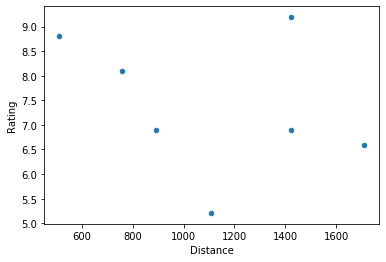

In [208]:
rate_dis.plot(x ='Distance', y='Rating', kind = 'scatter')

## Regression

In [78]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import pandas as pd 

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

series = pd.read_csv (r'D:\Texas A&M University\Summer 2020\Python\IBM Data Science Professional\9.Capstone\US-covid.csv')
print(series)

    date_start                   country  confirmed_cases  deaths  recovered  \
0    1/22/2020  United States of America                1       0          0   
1    1/23/2020  United States of America                1       0          0   
2    1/24/2020  United States of America                2       0          0   
3    1/25/2020  United States of America                2       0          0   
4    1/26/2020  United States of America                5       0          0   
..         ...                       ...              ...     ...        ...   
129  5/30/2020  United States of America          1770165  103776     416461   
130  5/31/2020  United States of America          1790172  104381     444758   
131   6/1/2020  United States of America          1811020  105149     458231   
132   6/2/2020  United States of America          1831821  106180     463868   
133   6/3/2020  United States of America          1851520  107175     479258   

      active  log-active  
0          1

C:\Users\xueya\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
C:\Users\xueya\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  import sys


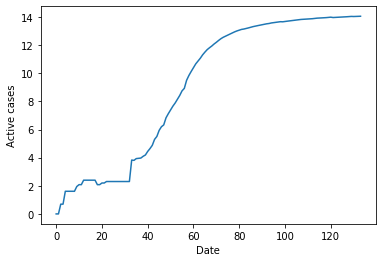

In [80]:
series.head()
plt.xlabel('Date')
plt.ylabel('Active cases')
plt.plot(series['log-active'])

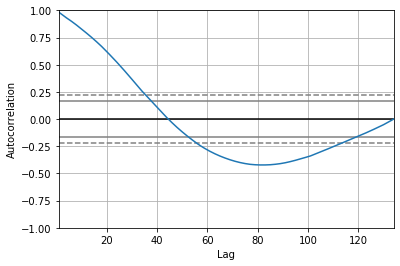

In [7]:
autocorrelation_plot(series['log-active'])
pyplot.show()

                             ARIMA Model Results                              
Dep. Variable:           D.log-active   No. Observations:                  133
Model:                 ARIMA(2, 1, 1)   Log Likelihood                  40.689
Method:                       css-mle   S.D. of innovations              0.178
Date:                Wed, 01 Jul 2020   AIC                            -71.378
Time:                        00:22:49   BIC                            -56.926
Sample:                             1   HQIC                           -65.505
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1102      0.053      2.073      0.038       0.006       0.214
ar.L1.D.log-active     0.7363      0.118      6.253      0.000       0.506       0.967
ar.L2.D.log-active  

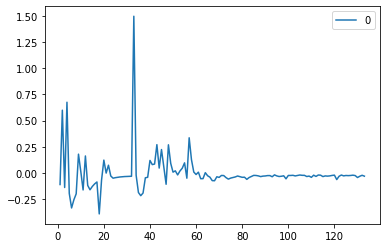

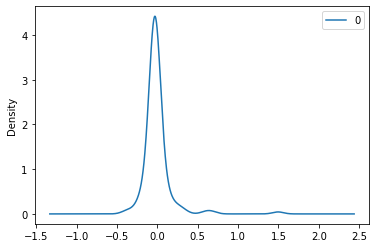

                0
count  133.000000
mean    -0.006092
std      0.180227
min     -0.390502
25%     -0.043203
50%     -0.028512
75%     -0.019578
max      1.495398


In [8]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(series['log-active'], order=(2,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())


## Import csv file

In [70]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

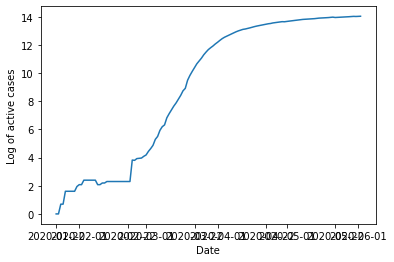

In [76]:
df = pd.read_csv(r'D:\Texas A&M University\Summer 2020\Python\IBM Data Science Professional\9.Capstone\US.csv', parse_dates = ['date_start'], index_col = ['date_start'])
df.head()
plt.xlabel('Date')
plt.ylabel('Log of active cases')
plt.plot(df['log_active'][0:133])

### ADF test

In [11]:
result = adfuller(df['log_active'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.645296370982438
p-value: 0.4594946462270914
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


##### This log of active cases series is not stationary. 

### Calculate the first difference of log(active cases)

In [12]:
df_shift = df - df.shift()
df_shift.dropna(inplace=True)

In [82]:
df_shift.head()

,log_active,time
date_start,,
2020-01-23,0.000000,1
2020-01-24,0.693147,2
2020-01-25,0.000000,3
2020-01-26,0.916291,4
2020-01-27,0.000000,5


#### ADF test of first differenced log(active cases)

In [14]:
result = adfuller(df_shift['log_active'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -4.192485632973042
p-value: 0.000678466536687841
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


##### This first differenced log(active cases) series is stationary

### ARIMA model

C:\Users\xueya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\xueya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:           D.log_active   No. Observations:                  133
Model:                 ARIMA(2, 1, 1)   Log Likelihood                  40.689
Method:                       css-mle   S.D. of innovations              0.178
Date:                Wed, 01 Jul 2020   AIC                            -71.378
Time:                        00:23:22   BIC                            -56.926
Sample:                    01-23-2020   HQIC                           -65.505
                         - 06-03-2020                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1102      0.053      2.073      0.038       0.006       0.214
ar.L1.D.log_active     0.7363      0.118      6.253      0.000       0.506       0.967
ar.L2.D.log_active  

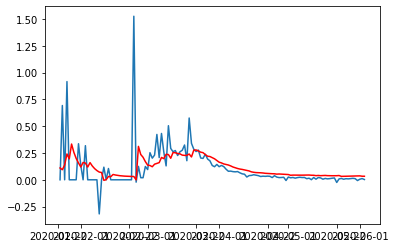

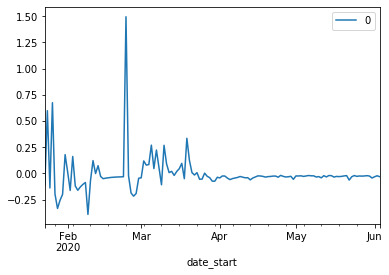

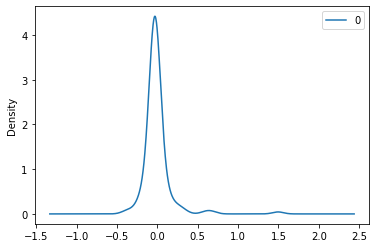

                0
count  133.000000
mean    -0.006092
std      0.180227
min     -0.390502
25%     -0.043203
50%     -0.028512
75%     -0.019578
max      1.495398


In [15]:
model = ARIMA(df['log_active'], order=(2,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
plt.plot(df_shift)
plt.plot(model_fit.fittedvalues,color='red')
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

### ARIMA + Trend

In [27]:
t=range(1,134)
df_shift['time']=t
df_shift.head()

,log_active,time
date_start,,
2020-01-23,0.000000,1
2020-01-24,0.693147,2
2020-01-25,0.000000,3
2020-01-26,0.916291,4
2020-01-27,0.000000,5


C:\Users\xueya\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:             log_active   No. Observations:                  133
Model:                     ARMA(2, 1)   Log Likelihood                  41.984
Method:                       css-mle   S.D. of innovations              0.176
Date:                Wed, 01 Jul 2020   AIC                            -71.968
Time:                        00:37:58   BIC                            -54.626
Sample:                    01-23-2020   HQIC                           -64.921
                         - 06-03-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2158      0.072      3.003      0.003       0.075       0.357
time                -0.0016      0.001     -1.772      0.076      -0.003       0.000
ar.L1.log_active     0.7034 

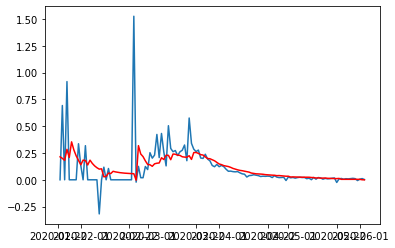

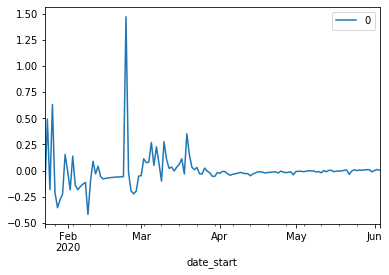

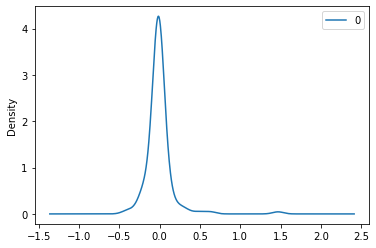

                0
count  133.000000
mean    -0.001895
std      0.177936
min     -0.418063
25%     -0.044017
50%     -0.011795
75%      0.004954
max      1.469446


In [33]:
model2 = ARIMA(df_shift['log_active'], order=(2,0,1),exog=df_shift['time'])
model_fit2 = model2.fit()
print(model_fit2.summary())
plt.plot(df_shift['log_active'])
plt.plot(model_fit2.fittedvalues,color='red')
residuals2 = pd.DataFrame(model_fit2.resid)
residuals2.plot()
pyplot.show()
residuals2.plot(kind='kde')
pyplot.show()
print(residuals2.describe())

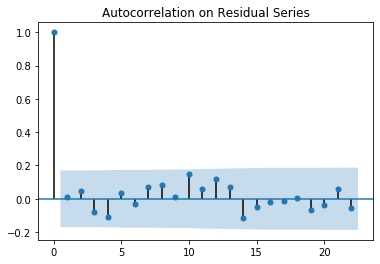

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plot_acf(residuals2, 
               title="Autocorrelation on Residual Series") 

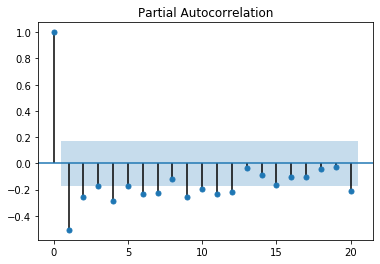

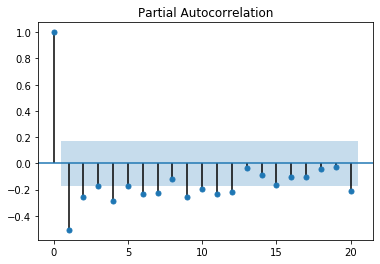

In [35]:
plot_pacf(residuals2.diff().dropna(), lags=20)

In [44]:
start_index = '2020-06-04'
end_index = '2020-12-31'
newt=range(134,345)
forecast = model_fit2.predict(start=start_index, end=end_index,exog=newt)

In [50]:
forecast

2020-06-04    0.000197
2020-06-05   -0.001049
2020-06-06   -0.002565
2020-06-07   -0.004035
2020-06-08   -0.005526
                ...   
2020-12-27   -0.326478
2020-12-28   -0.328073
2020-12-29   -0.329668
2020-12-30   -0.331263
2020-12-31   -0.332858
Freq: D, Length: 211, dtype: float64

In [54]:
path=r'D:\Texas A&M University\Summer 2020\Python\IBM Data Science Professional\9.Capstone'

In [57]:
fct = pd.DataFrame(forecast)
fct.to_csv(path+'\\fct.csv',sep=',',index=False)

# Plot the forecasting values of active cases

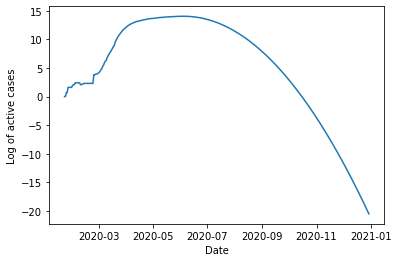

In [61]:
logfct = pd.read_csv(r'D:\Texas A&M University\Summer 2020\Python\IBM Data Science Professional\9.Capstone\log_active_fct.csv', parse_dates = ['date_start'], index_col = ['date_start'])
logfct.head()
plt.xlabel('Date')
plt.ylabel('Log of active cases')
plt.plot(logfct)

In [83]:
acfct = pd.read_csv(r'D:\Texas A&M University\Summer 2020\Python\IBM Data Science Professional\9.Capstone\Active_fct.csv', parse_dates = ['date_start'], index_col = ['date_start'])
acfct.tail(15)

,Active
date_start,
2020-10-05,8
2020-10-06,7
2020-10-07,6
2020-10-08,5
2020-10-09,4
2020-10-10,3
2020-10-11,3
2020-10-12,2
2020-10-13,2


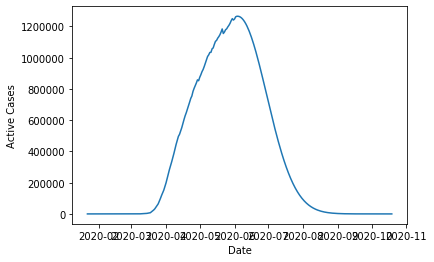

In [63]:
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.plot(acfct)